In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import nibabel as nib
import nilearn

In [374]:
dfc_init = np.load('/neurospin/lbi/monkeyfmri/deepstim/database/ANESTHETIC_database/derivatives/reference_kmeans/inputs/inputs.npy')
meta_init = pd.read_csv("/neurospin/lbi/monkeyfmri/deepstim/database/ANESTHETIC_database/derivatives/reference_kmeans/inputs/metadata.tsv", sep="\t")
n_wins = 464
dfc_init = dfc_init.reshape((-1, n_wins, 82, 82))

In [76]:
dfc_001_01_no_confound = np.load('/neurospin/lbi/monkeyfmri/deepstim/workspace/2023_ASM_tembedding/gitproject/2023_asm_tembedding/data/DFCs/0.001-0.01-addcompor-False-remove_confounds-False/dfc.npy')
meta_001_01_no_confound = pd.read_csv("/neurospin/lbi/monkeyfmri/deepstim/workspace/2023_ASM_tembedding/gitproject/2023_asm_tembedding/data/DFCs/0.001-0.01-addcompor-False-remove_confounds-False/meta.csv", sep="\t")
n_wins = 461
dfc_001_01_no_confound = dfc_001_01_no_confound.reshape((-1, n_wins, 82, 82))

In [49]:
dfc_001_01 = np.load('/neurospin/lbi/monkeyfmri/deepstim/workspace/2023_ASM_tembedding/gitproject/2023_asm_tembedding/data/DFCs/0.001-0.01-addcompor-False/dfc.npy')
meta_001_01 = pd.read_csv("/neurospin/lbi/monkeyfmri/deepstim/workspace/2023_ASM_tembedding/gitproject/2023_asm_tembedding/data/DFCs/0.001-0.01-addcompor-False/meta.csv", sep="\t")
n_wins = 461
dfc_init = dfc_init.reshape((-1, n_wins, 82, 82))

In [3]:
dfc_01_15 = np.load('/neurospin/lbi/monkeyfmri/deepstim/workspace/2023_ASM_tembedding/gitproject/2023_asm_tembedding/data/DFCs/0.01-0.15-add_compor-False/dfc.npy')
meta_01_15 = pd.read_csv("/neurospin/lbi/monkeyfmri/deepstim/workspace/2023_ASM_tembedding/gitproject/2023_asm_tembedding/data/DFCs/0.01-0.15-add_compor-False/meta.csv")
n_wins = 461
dfc_01_15 = dfc_01_15.reshape((-1, n_wins, 82, 82))

In [3]:
dfc_03_11 = np.load('/neurospin/lbi/monkeyfmri/deepstim/workspace/2023_ASM_tembedding/gitproject/2023_asm_tembedding/data/DFCs/0.03-0.11-addcompor-False/inputs_04-08.npy')
meta_03_11 = pd.read_csv("/neurospin/lbi/monkeyfmri/deepstim/workspace/2023_ASM_tembedding/gitproject/2023_asm_tembedding/data/DFCs/0.03-0.11-addcompor-False/meta_04-08.csv", sep="\t")
n_wins = 461
dfc_03_11 = dfc_03_11.reshape((-1, n_wins, 82, 82))

In [4]:
dfc_raw = np.load('/neurospin/lbi/monkeyfmri/deepstim/workspace/2023_ASM_tembedding/gitproject/2023_asm_tembedding/data/DFCs/raw/dfc.npy')
meta_raw = pd.read_csv("/neurospin/lbi/monkeyfmri/deepstim/workspace/2023_ASM_tembedding/gitproject/2023_asm_tembedding/data/DFCs/raw/meta.csv", sep="\t")
n_wins = 461
dfc_raw = dfc_raw.reshape((-1, n_wins, 82, 82))

In [82]:
def display(i,j):
    fig = plt.figure(figsize=(22, 11))
    
    # setting values to rows and column variables
    rows = 2
    columns = 3

    fig.add_subplot(rows, columns, 1)
    plt.imshow(dfc_init[i,j,:,:])
    plt.title("bechir")

    fig.add_subplot(rows, columns, 2)
    plt.imshow(dfc_raw[i,j,:,:])
    plt.title("raw")

    fig.add_subplot(rows, columns, 3)
    plt.imshow(dfc_001_01_no_confound[i,j,:,:])
    plt.title("001-01-no_confound")

    fig.add_subplot(rows, columns, 4)
    plt.imshow(dfc_001_01[i,j,:,:])
    plt.title("001-01")

    fig.add_subplot(rows, columns, 5)
    plt.imshow(dfc_01_15[i,j,:,:])
    plt.title("01-15")

    fig.add_subplot(rows, columns, 6)
    plt.imshow(dfc_03_11[i,j,:,:])
    plt.title("03-11")
    
    plt.show()

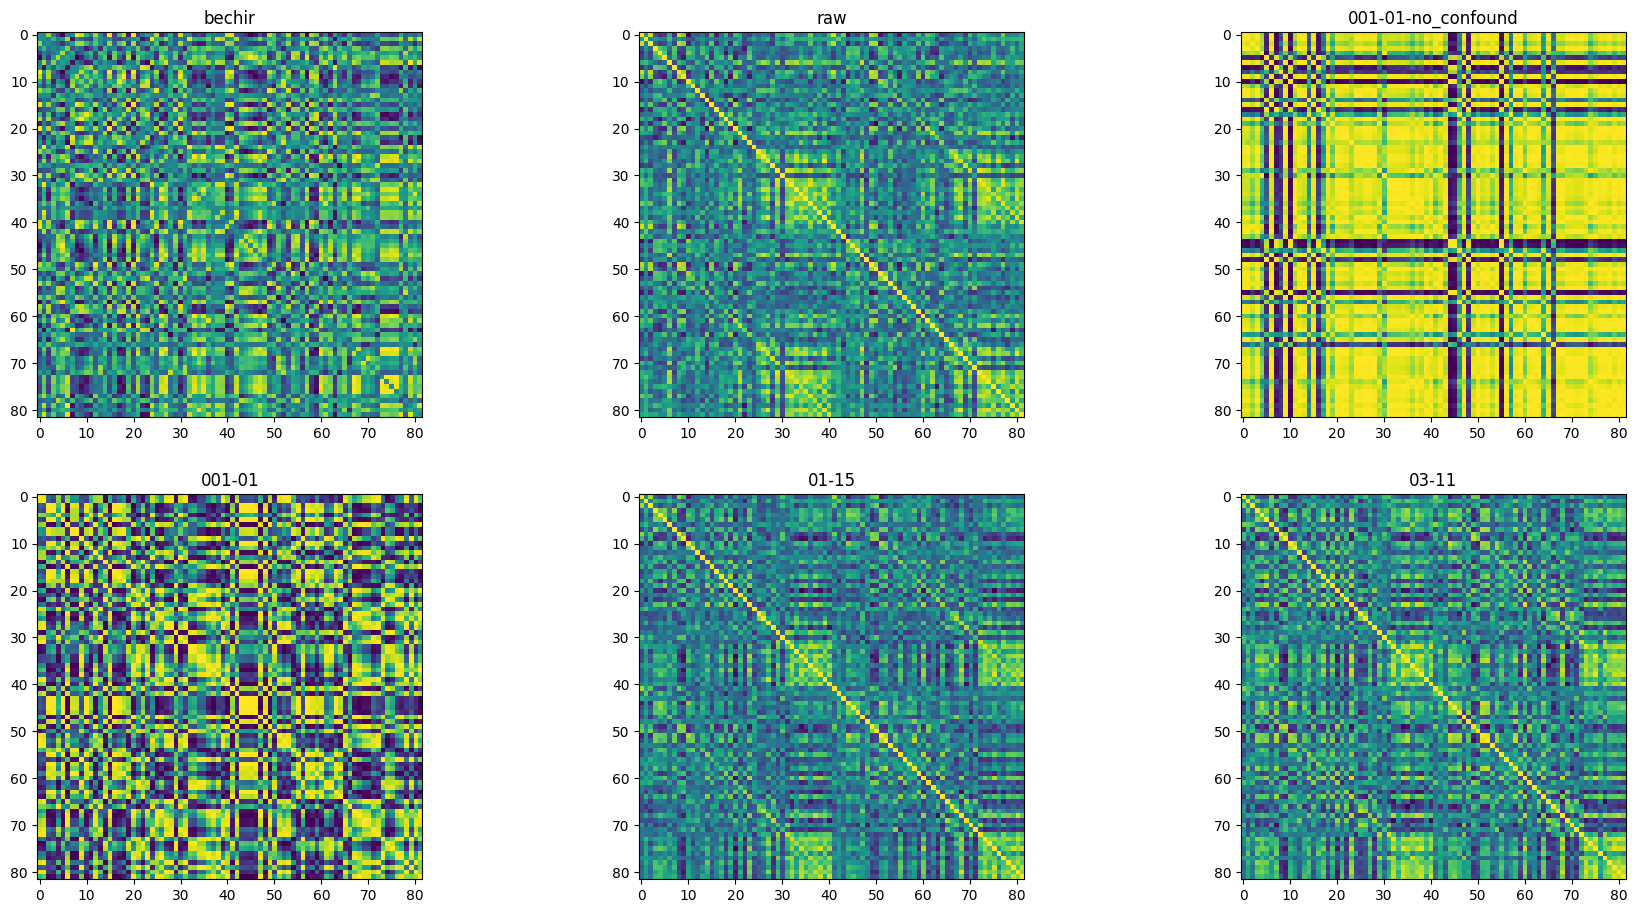

In [111]:
display(50,180)

In [4]:
id_sessions_awake = [i for i in range(len(meta_01_15)) if meta_01_15["condition"].iloc[i] == "awake"]
id_sessions_light_propofol = [i for i in range(len(meta_01_15)) if meta_01_15["condition"].iloc[i] == "light-propofol"]
id_sessions_deep_propofol = [i for i in range(len(meta_01_15)) if meta_01_15["condition"].iloc[i] == "deep-propofol"]
id_sessions_light_sevoflurane = [i for i in range(len(meta_01_15)) if meta_01_15["condition"].iloc[i] == "sevoflurane2"]
id_sessions_deep_sevoflurane = [i for i in range(len(meta_01_15)) if meta_01_15["condition"].iloc[i] == "sevoflurane4"]

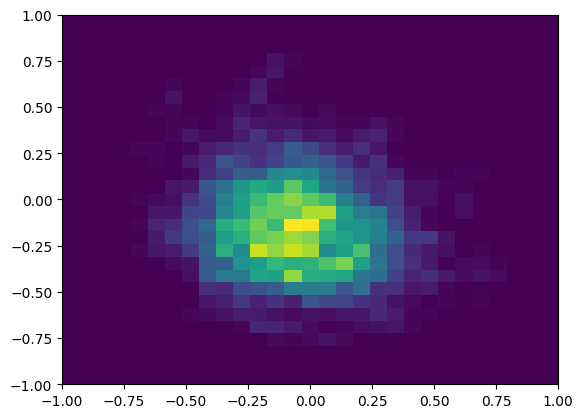

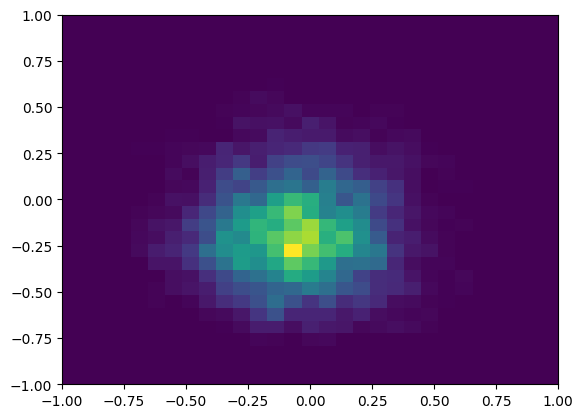

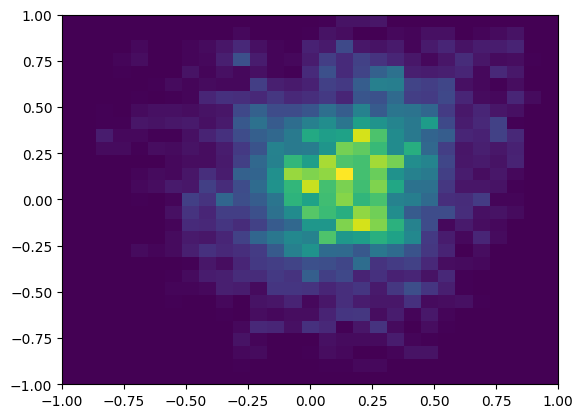

In [76]:
bins = np.linspace(-1,1,30)
plt.hist2d(x = dfc_01_15[id_sessions_light_propofol,:,78,20].flatten(), y = dfc_01_15[id_sessions_light_propofol,:,33,10].flatten(), bins = [bins,bins],density = True)
plt.show()
bins = np.linspace(-1,1,30)
plt.hist2d(x = dfc_01_15[id_sessions_deep_propofol,:,78,20].flatten(), y = dfc_01_15[id_sessions_deep_propofol,:,33,10].flatten(), bins = [bins,bins],density = True)
plt.show()
plt.hist2d(x = dfc_01_15[id_sessions_awake,:,78,20].flatten(), y = dfc_01_15[id_sessions_awake,:,33,10].flatten(), bins = [bins,bins],density = True)
plt.show()

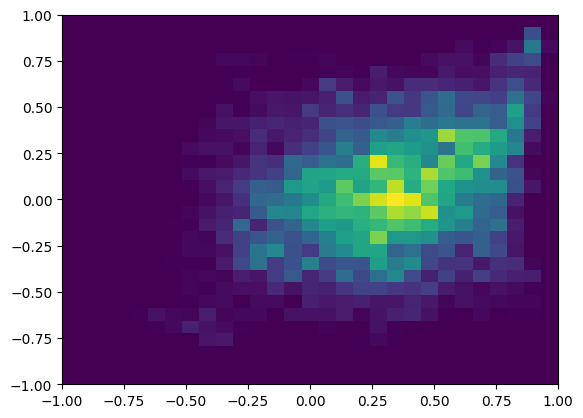

In [69]:
bins = np.linspace(-1,1,30)
counts_awake1,_ = np.histogram(dfc_01_15[id_sessions_awake,:,0,1].flatten(),bins)
counts_awake2,_ = np.histogram(dfc_01_15[id_sessions_awake,:,0,10].flatten(),bins)
counts = counts_awake1 * counts_awake2
plt.hist2d(x = dfc_01_15[id_sessions_awake,:,0,1].flatten(), y = dfc_01_15[id_sessions_awake,:,0,10].flatten(), bins = [bins,bins],density = True)
plt.show()

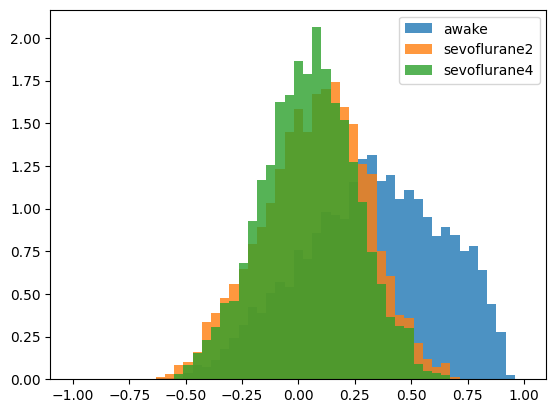

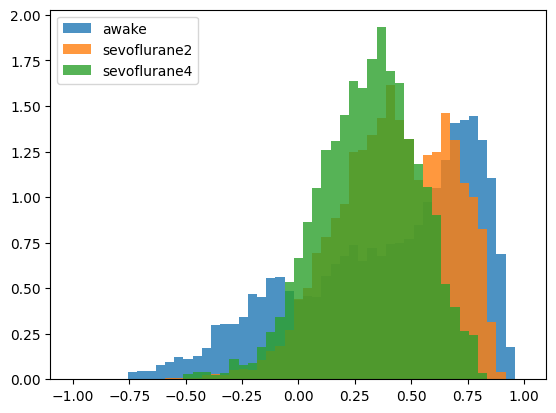

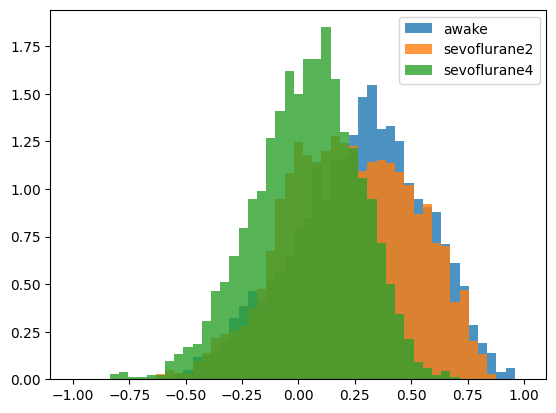

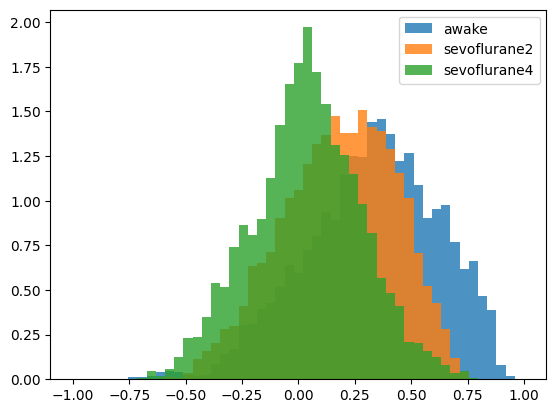

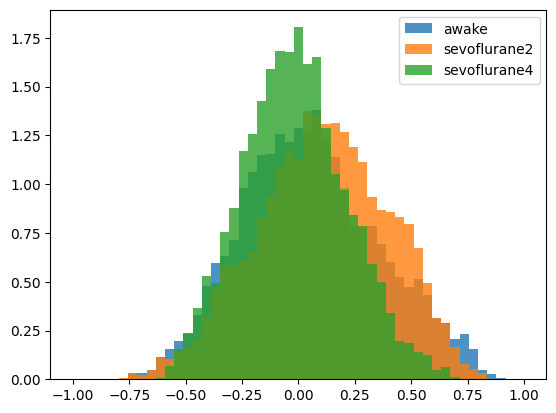

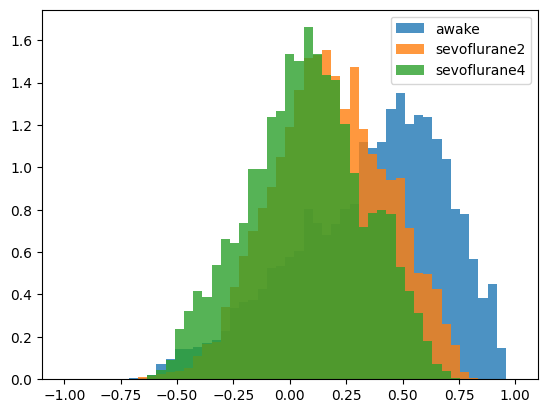

In [107]:
compteur = 0
bins = np.linspace(-1,1,50)
for i in range(82):
    for j in range(i+1,82):
        if compteur > 5:
            break
        counts_awake,_ = np.histogram(dfc_01_15[id_sessions_awake,:,i,j].flatten(),bins)
        counts_light_sevoflurane,_ = np.histogram(dfc_01_15[id_sessions_light_sevoflurane,:,i,j].flatten(),bins)
        counts_deep_sevoflurane,_ = np.histogram(dfc_01_15[id_sessions_deep_sevoflurane,:,i,j].flatten(),bins)
        plt.hist(bins[:-1], bins, weights=counts_awake,density = True,label="awake",alpha=0.8)
        plt.hist(bins[:-1], bins, weights=counts_light_sevoflurane,density = True,label="sevoflurane2",alpha=0.8)
        plt.hist(bins[:-1], bins, weights=counts_deep_sevoflurane,density = True,label="sevoflurane4",alpha=0.8)
        plt.legend()
        plt.show()
        compteur += 1 

In [5]:
iu = np.triu_indices(82,k=1)
dfc_flat = dfc_01_15[:,:,iu[0],iu[1]]

In [81]:
np.var(dfc_flat[id_sessions_awake,:,:].reshape(-1,3321))

0.16079374000821522

In [84]:
np.var(dfc_flat[id_sessions_light_sevoflurane,:,:].reshape(-1,3321))

0.09116410308953829

In [85]:
np.var(dfc_flat[id_sessions_deep_sevoflurane,:,:].reshape(-1,3321))

0.07097617942552491

In [376]:
var_awake = [np.var(dfc_flat[id_sessions_awake[i],:,:])for i in range(len(id_sessions_awake))]
var_light_sevoflurane = [np.var(dfc_flat[id_sessions_light_sevoflurane[i],:,:])for i in range(len(id_sessions_light_sevoflurane))]
var_deep_sevoflurane = [np.var(dfc_flat[id_sessions_deep_sevoflurane[i],:,:])for i in range(len(id_sessions_deep_sevoflurane))]

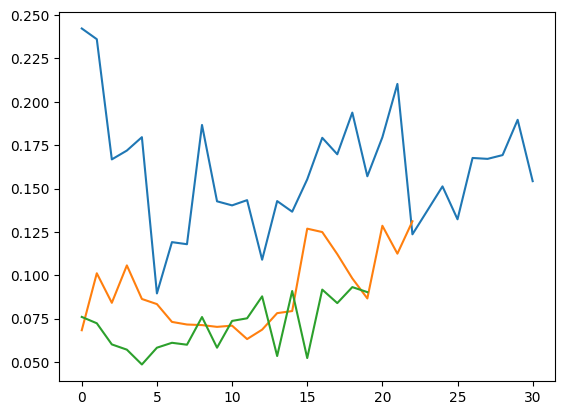

In [92]:
plt.plot(var_awake)
plt.plot(var_light_sevoflurane)
plt.plot(var_deep_sevoflurane)

In [6]:
idx = np.concatenate([id_sessions_awake,id_sessions_light_sevoflurane,id_sessions_deep_sevoflurane])
X = dfc_flat[idx,:,:].reshape(-1,3321)
pca = PCA(n_components=100)
scaler = StandardScaler()
X_reduced = pca.fit_transform(X)
X_reduced_norm = scaler.fit_transform(X_reduced)
dfc_reduced = X_reduced_norm.reshape(len(idx),461,100)

In [7]:
n = len(id_sessions_awake)
m = len(id_sessions_light_sevoflurane)
k = len(id_sessions_deep_sevoflurane)

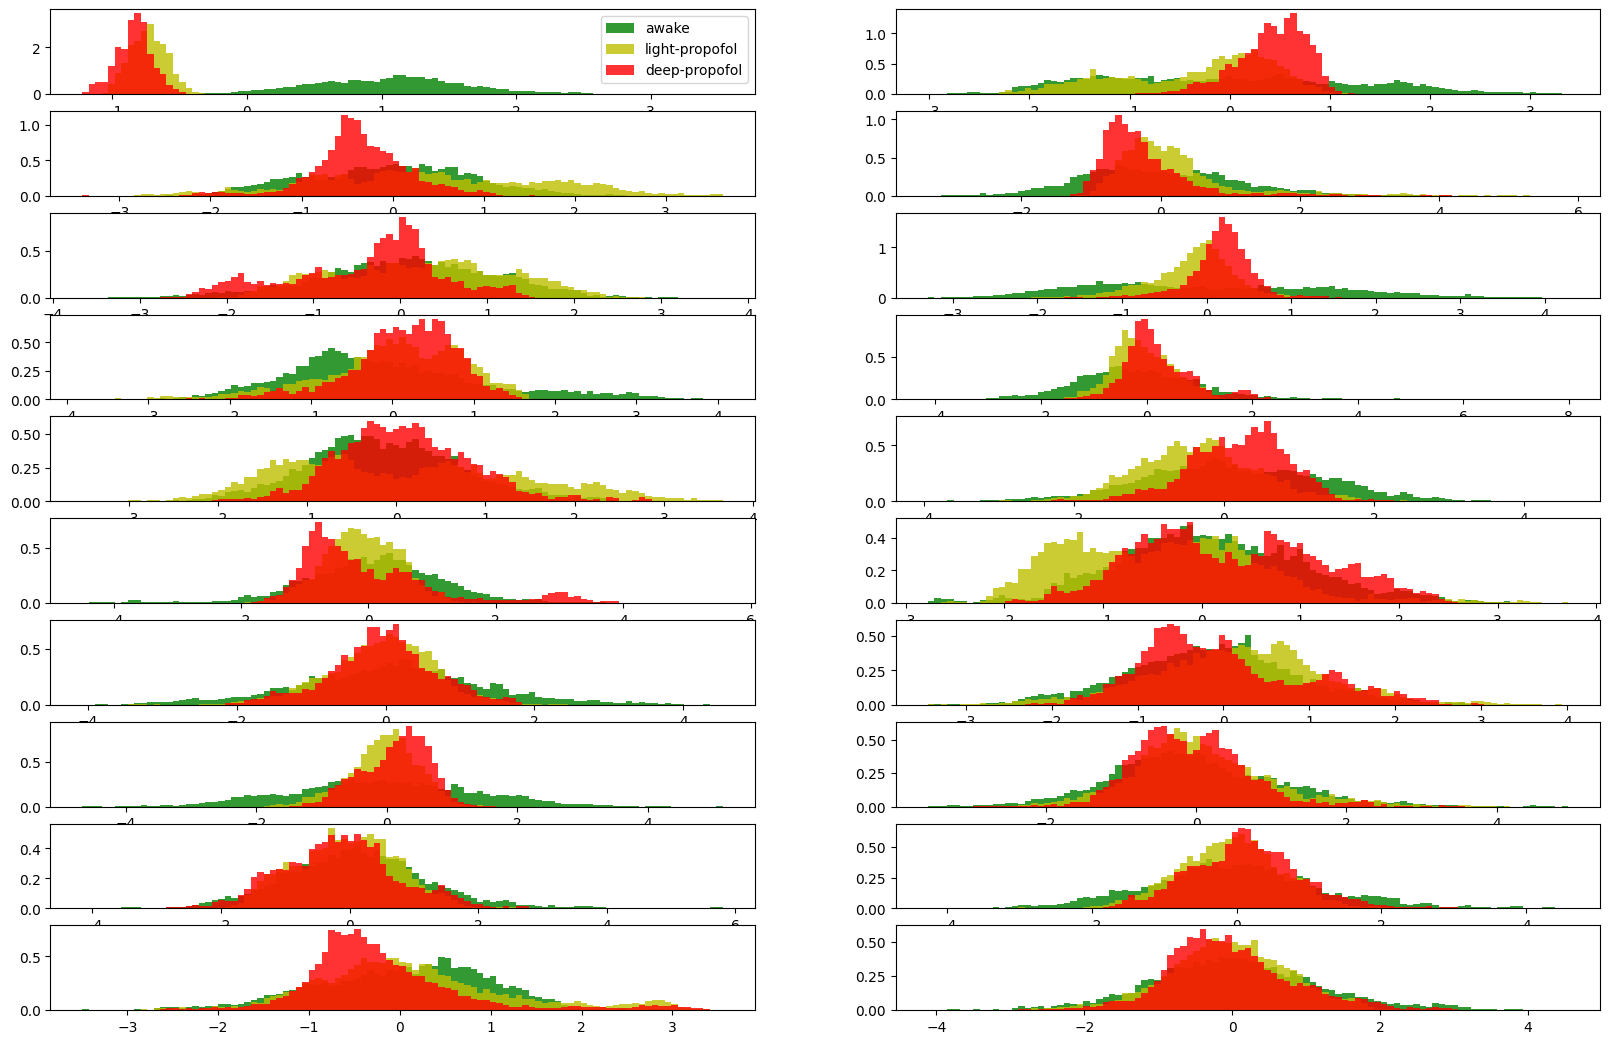

In [8]:
compteur = 0

fig = plt.figure(figsize=(20,13))

for i in range(20):
    v_min = np.min(dfc_reduced[:,:,i])
    v_max = np.max(dfc_reduced[:,:,i])
    bins = np.linspace(v_min,v_max,100)
    counts_awake,_ = np.histogram(dfc_reduced[:n,:,i].flatten(),bins)
    counts_light_sevoflurane,_ = np.histogram(dfc_reduced[n:n+m,:,i].flatten(),bins)
    counts_deep_sevoflurane,_ = np.histogram(dfc_reduced[n+m:n+m+k,:,i].flatten(),bins)
    fig.add_subplot(10, 2, i+1)
    plt.hist(bins[:-1], bins, weights=counts_awake,density = True,label="awake",color="g",alpha=0.8)
    plt.hist(bins[:-1], bins, weights=counts_light_sevoflurane,density = True,label="light-propofol",color="y",alpha=0.8)
    plt.hist(bins[:-1], bins, weights=counts_deep_sevoflurane,density = True,label="deep-propofol",color="r",alpha=0.8)
    if i == 0:
        plt.legend()
    compteur += 1 
plt.show()

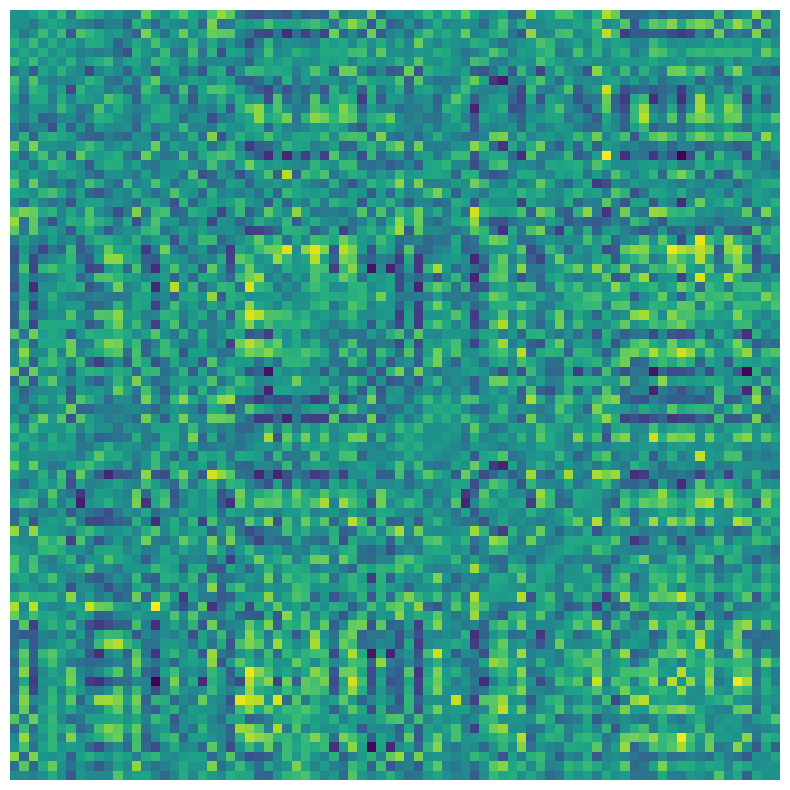

In [8]:
im = np.zeros((82,82))
iu = np.triu_indices(82,k=1)
il = np.tril_indices(82,k=-1)
im[iu[0],iu[1]] = pca.components_[10,:]
im = np.transpose(im)
im[iu[0],iu[1]] = pca.components_[10,:]
plt.figure(figsize=(10,10))
plt.imshow(im)
plt.axis("off")
plt.show()

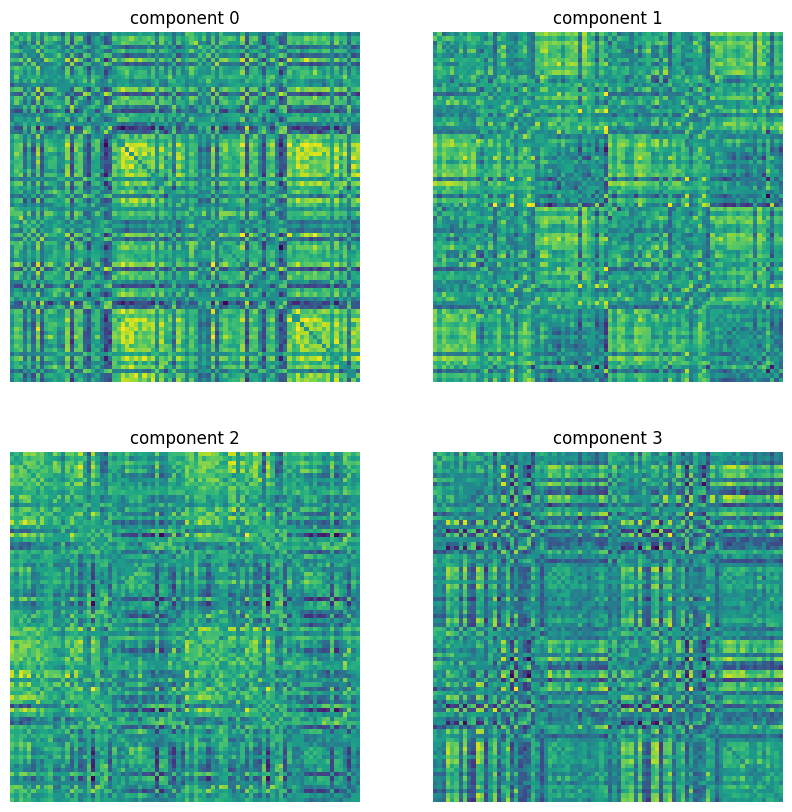

In [283]:
fig = plt.figure(figsize=(10,10))

for i in range(4):
    im = np.zeros((82,82))
    iu = np.triu_indices(82,k=1)
    il = np.tril_indices(82,k=-1)
    im[iu[0],iu[1]] = pca.components_[i,:]
    im = np.transpose(im)
    im[iu[0],iu[1]] = pca.components_[i,:]
    fig.add_subplot(2,2,i+1)
    plt.imshow(im)
    plt.axis("off")
    plt.title(label="component {}".format(i))
plt.show()

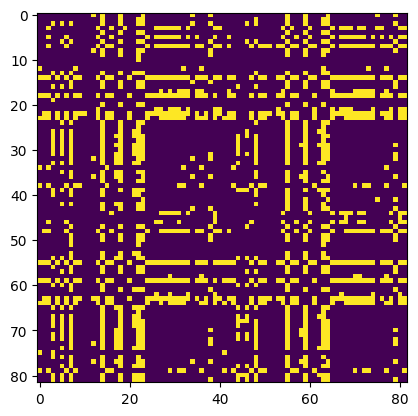

In [304]:
plt.imshow(im < -0.01)

In [307]:
li_id = np.where(im[0,:] < -0.01)

(array([12, 14, 18, 23, 34, 38, 55, 59, 64, 75, 79]),)

In [20]:
np.max(anatomical)

66.37832641601562

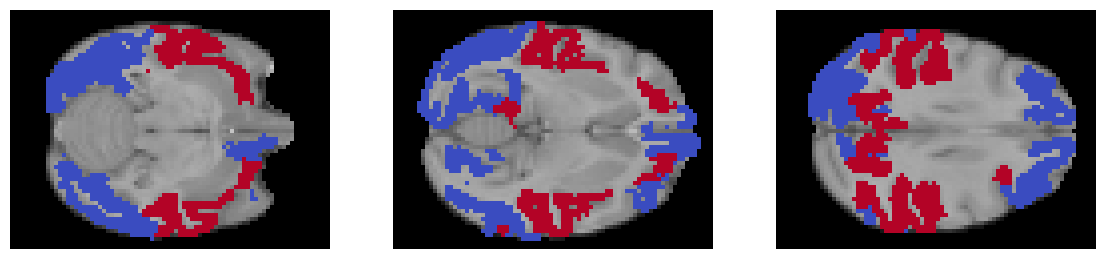

In [74]:
cocomac = nib.load("/neurospin/lbi/monkeyfmri/resting_state/references/rRM_F99_ROItemplate_MNI.nii").get_fdata()
anatomical = nib.load("/neurospin/lbi/monkeyfmri/images/reference/mni-resampled_1by1by1.nii").get_fdata()

li_idx = np.unique(cocomac)
im = np.zeros((82,82))
iu = np.triu_indices(82,k=1)
il = np.tril_indices(82,k=-1)
scaler = MinMaxScaler()
reduced_component = pca.components_[0,:]/np.max(np.abs(pca.components_[0,:]))
im[iu[0],iu[1]] = reduced_component
im = np.transpose(im)
im[iu[0],iu[1]] = reduced_component
li_id_neg = np.where(im[0,:] < -0.1)[0]+1
li_id_pos = np.where(im[0,:] > 0.1)[0]+1
li_neg = li_idx[li_id_neg]
li_pos = li_idx[li_id_pos]
n = 47
rows = n // 5 + 1
columns = 5
fig = plt.figure(figsize=(14,11))
accu = -np.isin(cocomac,li_neg).astype(float) + np.isin(cocomac,li_pos).astype(float)
x,y,z = np.where(accu[:,:,:] == 0)
accu[x,y,z] = np.nan

l = [20,25,31]
for i in range(3):
    fig.add_subplot(1,3, i+1)
    # showing image
    plt.imshow(anatomical[:,:,l[i]],cmap=plt.cm.gray,vmin = 0,vmax = 60)
    plt.imshow(accu[:,:,l[i]],cmap = "coolwarm", vmin = -1, vmax = 1)
    plt.axis('off')

In [50]:
x,y = np.where(accu[:,:,24] == 0)
accu[x,y] = np.nan

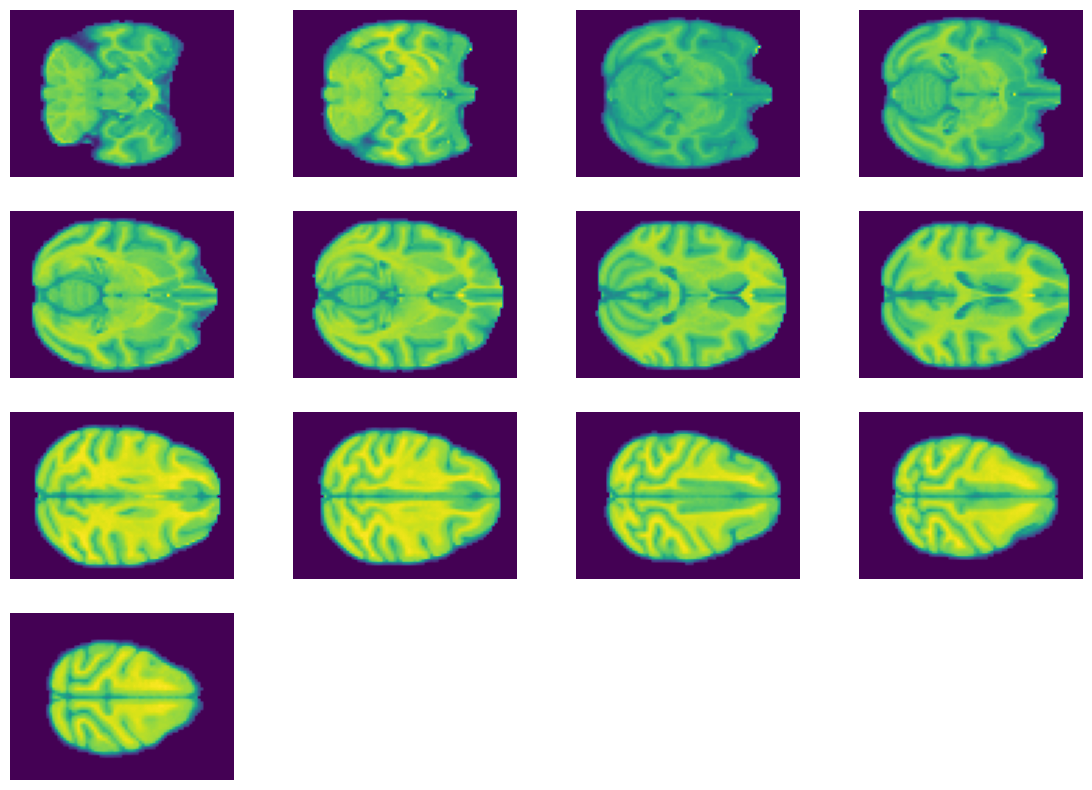

In [373]:
test_load = nib.load("/neurospin/lbi/monkeyfmri/images/reference/mni-resampled_1by1by1.nii").get_fdata()
fig = plt.figure(figsize=(14,10))
l = [15,17,19,21,23,25,27,29,31,33,35,37,39]
for i in range(13):
    fig.add_subplot(4,4, i+1)
    # showing image
    plt.imshow(test_load[:,:,l[i]])
    plt.axis('off')
plt.show()

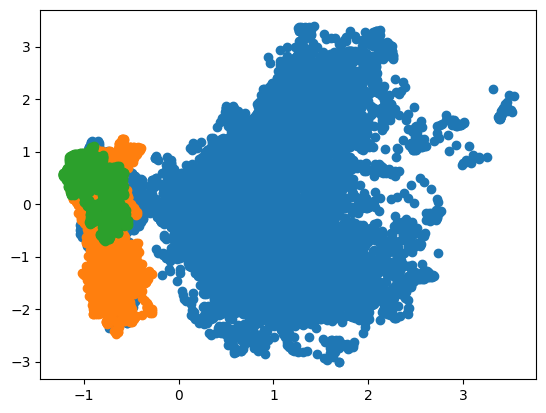

In [78]:
plt.scatter(x = dfc_reduced[:n,:,0].flatten(), y = dfc_reduced[:n,:,1].flatten())
plt.scatter(x = dfc_reduced[n:n+m,:,0].flatten(), y = dfc_reduced[n:n+m,:,1].flatten())
plt.scatter(x = dfc_reduced[n+m:n+m+k,:,0].flatten(), y = dfc_reduced[n+m:n+m+k,:,1].flatten())

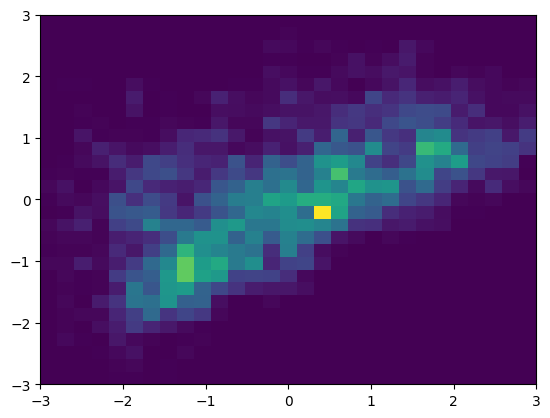

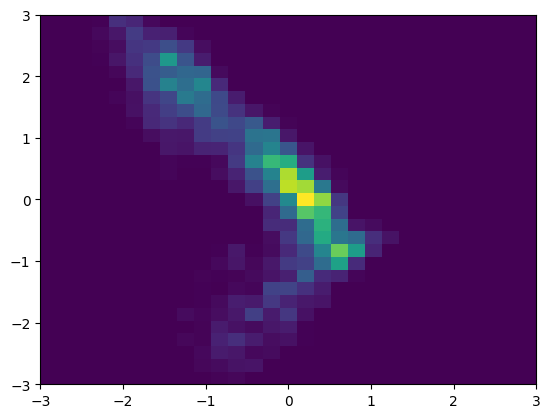

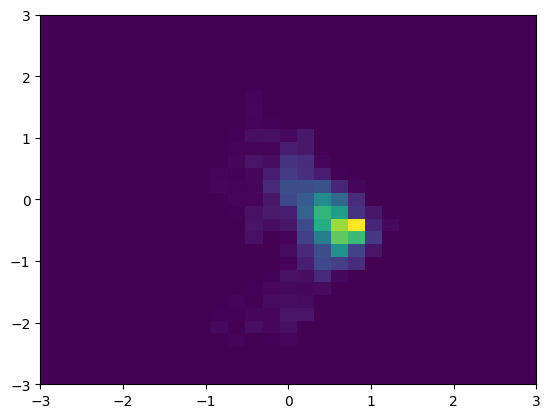

In [183]:
bins = np.linspace(-3,3,30)
plt.hist2d(x = dfc_reduced[:n,:,1].flatten(), y = dfc_reduced[:n,:,2].flatten(), bins = [bins,bins],density = True)
plt.show()
plt.hist2d(x = dfc_reduced[n:n+m,:,1].flatten(), y = dfc_reduced[n:n+m,:,2].flatten(), bins = [bins,bins],density = True)
plt.show()
plt.hist2d(x = dfc_reduced[n+m:n+m+k,:,1].flatten(), y = dfc_reduced[n+m:n+m+k,:,2].flatten(), bins = [bins,bins],density = True)
plt.show()

In [143]:
confounds = np.load("/neurospin/lbi/monkeyfmri/deepstim/workspace/2023_ASM_tembedding/gitproject/2023_asm_tembedding/data/Confounds/confounds.npy")

In [284]:
len(idx)

74

In [285]:
aux = confounds[idx,4:,1]
factor = np.array([np.mean(aux[session,i:i+35]) for i in range(496-35) for session in range(74)])
x = dfc_reduced[:,:,0].reshape(-1)

In [288]:
aux.shape

(74, 496)

In [290]:
for k in range(7):
    aux = confounds[idx,4:,k]
    factor = np.array([np.mean(aux[session,i:i+35]) for i in range(496-35) for session in range(74)])
    x = dfc_reduced[:,:,0].reshape(-1)
    print(np.corrcoef(factor,x))

[[ 1.       -0.019432]
 [-0.019432  1.      ]]
[[ 1.         -0.04663474]
 [-0.04663474  1.        ]]
[[1.         0.00674955]
 [0.00674955 1.        ]]
[[1.         0.01720569]
 [0.01720569 1.        ]]
[[1.         0.03162342]
 [0.03162342 1.        ]]
[[ 1.         -0.03789912]
 [-0.03789912  1.        ]]
[[1.        0.0059931]
 [0.0059931 1.       ]]
